# Previsão de renda

### 4 elementos importantes
- Esse notebook
- Streamlit com as análises
- Seu Github com o projeto
- Vídeo no readme do github mostrando o streamlit

## Etapa 1 CRISP - DM: Entendimento do negócio

O entendimento do negócio será de apresentar e mostrar quais sao as variaveis que apresentam algo grau de correlação com a renda e analiza-las e monta o modelo preditivo possível em questão de credito.



## Etapa 2 Crisp-DM: Entendimento dos dados



### Dicionário de dados



| Variável                | Descrição                                           | Tipo         |
| ----------------------- |:---------------------------------------------------:| ------------:|
| data_ref                |  Data de referência                                 | Objeto |
| id_cliente              |  Id do cliente                                      | Int |
| sexo                    |  Sexo do cliente                                    | Objeto |
| posse_de_veiculo        |  Possui veiculo?                                    | Booleano |
| posse_de_imovel         |  Possui imovel?                                     | Booleano |
| qtd_filhos              |  Quantos filhos?                                    | Int |
| tipo_renda              |  Tipo de renda                                      | Objeto |
| educacao                |  Escolaridade                                       | Objeto |
| estado_civil            |  Estado civil                                       | Objeto |
| tipo_residencia         |  Tipo de residência                                 | Objeto |
| idade                   |  Idade                                              | Int |
| tempo_emprego           |  Tempo de empregabiilidade                          | Float |
| qt_pessoas_residencia   |  Quantidade de pessoas na residência                | Float |
| renda                   |  Renda                                              | Float |





#### Carregando os pacotes
É considerado uma boa prática carregar os pacotes que serão utilizados como a primeira coisa do programa.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn import tree

%matplotlib inline

C:\Users\Victor Hugo\AppData\Local\Temp\ipykernel_21256\3819957621.py:5: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


#### Carregando os dados
O comando pd.read_csv é um comando da biblioteca pandas (pd.) e carrega os dados do arquivo csv indicado para um objeto *dataframe* do pandas.

In [2]:
renda = pd.read_csv('./input/previsao_de_renda.csv')

In [3]:
renda.drop(labels='Unnamed: 0', axis = 1, inplace=True)


In [4]:
renda

,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2016-03-01,16006,F,False,True,0,Empresário,Secundário,Solteiro,Casa,48,13.887671,1.0,7990.58
14996,2016-03-01,3722,F,False,True,0,Pensionista,Superior completo,Solteiro,Casa,57,NaN,1.0,10093.45
14997,2016-03-01,6194,F,True,True,0,Assalariado,Superior completo,Casado,Casa,45,7.832877,2.0,604.82
14998,2016-03-01,4922,M,True,False,0,Empresário,Superior completo,Casado,Casa,36,4.298630,2.0,3352.27


In [5]:
renda.dtypes

data_ref                  object
id_cliente                 int64
sexo                      object
posse_de_veiculo            bool
posse_de_imovel             bool
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                      int64
tempo_emprego            float64
qt_pessoas_residencia    float64
renda                    float64
dtype: object

#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis. 

In [6]:
prof = ProfileReport(renda, explorative=True, minimal=True)
prof


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
prof.to_file('./output/renda_analisys.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Entendimento dos dados - Bivariadas




Foi possivel perceber que o conjunto de dados, com 15000 linhas e 14 colunas onde sao classiificadas em 6 Objetos, 6 Numericas (3 Int e 3 Float) e 2 Booleanos, no total, há 1,2 % de conjunto inteiro com dados faltante, o que não irá prejudicar o treinamento, como as colunas 'data_ref', 'id_cliente' e 'Unammed: 0' não serão uteis para nosso sistema, irei retirar apenas para uma melhor vizualizazção do dataset. As variaveis categoricas são analisadas e transformadas em dummies para serem treinadas corretamente e fazer um machine learning de qualidade. 


## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?



In [8]:
renda.drop(columns=['data_ref', 'id_cliente'], axis=1, inplace=True)

In [9]:
renda

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97
...,...,...,...,...,...,...,...,...,...,...,...,...
14995,F,False,True,0,Empresário,Secundário,Solteiro,Casa,48,13.887671,1.0,7990.58
14996,F,False,True,0,Pensionista,Superior completo,Solteiro,Casa,57,NaN,1.0,10093.45
14997,F,True,True,0,Assalariado,Superior completo,Casado,Casa,45,7.832877,2.0,604.82
14998,M,True,False,0,Empresário,Superior completo,Casado,Casa,36,4.298630,2.0,3352.27


In [10]:
renda.isna().sum()


sexo                        0
posse_de_veiculo            0
posse_de_imovel             0
qtd_filhos                  0
tipo_renda                  0
educacao                    0
estado_civil                0
tipo_residencia             0
idade                       0
tempo_emprego            2573
qt_pessoas_residencia       0
renda                       0
dtype: int64

In [11]:
renda = renda.dropna()
renda

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97
...,...,...,...,...,...,...,...,...,...,...,...,...
14994,M,True,False,0,Empresário,Superior incompleto,Casado,Casa,32,9.849315,2.0,1592.57
14995,F,False,True,0,Empresário,Secundário,Solteiro,Casa,48,13.887671,1.0,7990.58
14997,F,True,True,0,Assalariado,Superior completo,Casado,Casa,45,7.832877,2.0,604.82
14998,M,True,False,0,Empresário,Superior completo,Casado,Casa,36,4.298630,2.0,3352.27


In [12]:
num_duplicates = renda.duplicated().sum()
print(num_duplicates)

3772


In [13]:
renda = renda.drop_duplicates()

In [14]:
renda['tem_filhos'] = renda['qtd_filhos'] != 0 

C:\Users\Victor Hugo\AppData\Local\Temp\ipykernel_21256\4158589386.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  renda['tem_filhos'] = renda['qtd_filhos'] != 0


In [15]:
new_order = ['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos', 'tem_filhos', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia', 'idade' , 'tempo_emprego', 'qt_pessoas_residencia', 'renda']
renda = renda.reindex(columns=new_order)

In [16]:
renda

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tem_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,F,False,True,0,False,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,M,True,True,0,False,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,F,True,True,0,False,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,F,False,True,1,True,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,M,True,False,0,False,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14988,M,False,True,0,False,Assalariado,Superior completo,Casado,Casa,58,4.164384,2.0,15702.40
14992,M,False,False,1,True,Assalariado,Superior completo,Casado,Casa,33,1.041096,3.0,1918.14
14997,F,True,True,0,False,Assalariado,Superior completo,Casado,Casa,45,7.832877,2.0,604.82
14998,M,True,False,0,False,Empresário,Superior completo,Casado,Casa,36,4.298630,2.0,3352.27


Não precisa de integração, pois é um unico dataset que iremos trabalhar 


In [17]:
renda = pd.get_dummies(renda, columns=['sexo', 'tipo_renda', 'educacao', 'tipo_residencia', 'estado_civil'])
renda

,posse_de_veiculo,posse_de_imovel,qtd_filhos,tem_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,sexo_F,sexo_M,...,tipo_residencia_Casa,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental,estado_civil_Casado,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo
0,False,True,0,False,26,6.602740,1.0,8060.34,True,False,...,True,False,False,False,False,False,False,True,False,False
1,True,True,0,False,28,7.183562,2.0,1852.15,False,True,...,True,False,False,False,False,True,False,False,False,False
2,True,True,0,False,35,0.838356,2.0,2253.89,True,False,...,True,False,False,False,False,True,False,False,False,False
3,False,True,1,True,30,4.846575,3.0,6600.77,True,False,...,True,False,False,False,False,True,False,False,False,False
4,True,False,0,False,33,4.293151,1.0,6475.97,False,True,...,False,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14988,False,True,0,False,58,4.164384,2.0,15702.40,False,True,...,True,False,False,False,False,True,False,False,False,False
14992,False,False,1,True,33,1.041096,3.0,1918.14,False,True,...,True,False,False,False,False,True,False,False,False,False
14997,True,True,0,False,45,7.832877,2.0,604.82,True,False,...,True,False,False,False,False,True,False,False,False,False
14998,True,False,0,False,36,4.298630,2.0,3352.27,False,True,...,True,False,False,False,False,True,False,False,False,False


In [18]:
renda.drop(labels='tem_filhos', axis=1, inplace=True)
renda

,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,sexo_F,sexo_M,tipo_renda_Assalariado,...,tipo_residencia_Casa,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental,estado_civil_Casado,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo
0,False,True,0,26,6.602740,1.0,8060.34,True,False,False,...,True,False,False,False,False,False,False,True,False,False
1,True,True,0,28,7.183562,2.0,1852.15,False,True,True,...,True,False,False,False,False,True,False,False,False,False
2,True,True,0,35,0.838356,2.0,2253.89,True,False,False,...,True,False,False,False,False,True,False,False,False,False
3,False,True,1,30,4.846575,3.0,6600.77,True,False,False,...,True,False,False,False,False,True,False,False,False,False
4,True,False,0,33,4.293151,1.0,6475.97,False,True,True,...,False,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14988,False,True,0,58,4.164384,2.0,15702.40,False,True,True,...,True,False,False,False,False,True,False,False,False,False
14992,False,False,1,33,1.041096,3.0,1918.14,False,True,True,...,True,False,False,False,False,True,False,False,False,False
14997,True,True,0,45,7.832877,2.0,604.82,True,False,True,...,True,False,False,False,False,True,False,False,False,False
14998,True,False,0,36,4.298630,2.0,3352.27,False,True,False,...,True,False,False,False,False,True,False,False,False,False


In [19]:
def replace_outliers_with_std(renda):
    for col in renda.select_dtypes(include='number').columns:
        q1 = renda[col].quantile(0.25)
        q3 = renda[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # Identificar outliers
        outliers = (renda[col] < lower_bound) | (renda[col] > upper_bound)

        # Substituir outliers pelo desvio padrão da coluna
        renda.loc[outliers, col] = renda[col].std()

    return renda

# Aplicando a função ao DataFrame
renda = replace_outliers_with_std(renda)

C:\Users\Victor Hugo\AppData\Local\Temp\ipykernel_21256\765593644.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.7961588481339682' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  renda.loc[outliers, col] = renda[col].std()
C:\Users\Victor Hugo\AppData\Local\Temp\ipykernel_21256\765593644.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '9.379424122660811' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  renda.loc[outliers, col] = renda[col].std()


## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo


### Rodando o modelo


In [20]:
X = renda.drop(['renda'], axis=1).copy()
y= renda['renda']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

In [22]:
modelo_1 = RandomForestRegressor(max_depth=2)
modelo_2 = RandomForestRegressor(max_depth=8)

modelo_1.fit(X_train, y_train)
modelo_2.fit(X_train, y_train)


RandomForestRegressor(max_depth=8)

In [23]:
mse1 = modelo_1.score(X_test, y_test)
mse2 = modelo_2.score(X_test, y_test)

print(f'O mse do modelo 1 é {mse1}')
print(f'O mse do modelo 2 é {mse2}')

O mse do modelo 1 é 0.19693092541581403
O mse do modelo 2 é 0.26821107347269435


In [24]:
modelo_2 = RandomForestRegressor (max_depth=8, min_samples_leaf=20)
modelo_2.fit(X_train, y_train) 
mse1 = modelo_2.score(X_test, y_test)
mse1

0.26691104793660236

In [25]:
r2s = []
i_indicador = []
j_indicador = []

for i in range(1, 9):
    for j in range (1, 9):
        modelo_2 = RandomForestRegressor(max_depth = i, min_samples_leaf=j, random_state=42)
        modelo_2.fit(X_train, y_train)
        r2_1 = modelo_2.score(X_test, y_test)
        r2s.append(r2_1)
        i_indicador.append(i)
        j_indicador.append(j)


n_minimo,1,2,3,4,5,6,7,8
profundidade,,,,,,,,
1,0.090837,0.090837,0.090837,0.090837,0.090837,0.090837,0.090837,0.090837
2,0.197312,0.197312,0.197312,0.197312,0.197312,0.197312,0.197312,0.197312
3,0.240164,0.240164,0.240164,0.240164,0.240164,0.240164,0.240164,0.240164
4,0.259936,0.259840,0.259784,0.259957,0.260009,0.260011,0.260071,0.259920
5,0.266635,0.266686,0.266675,0.266952,0.266961,0.266873,0.266883,0.266647
6,0.268226,0.268710,0.268636,0.268622,0.268944,0.268476,0.269022,0.269006
7,0.268218,0.268852,0.269706,0.270177,0.270897,0.270454,0.270262,0.269990
8,0.266924,0.267466,0.267955,0.268035,0.268738,0.267572,0.267799,0.267721


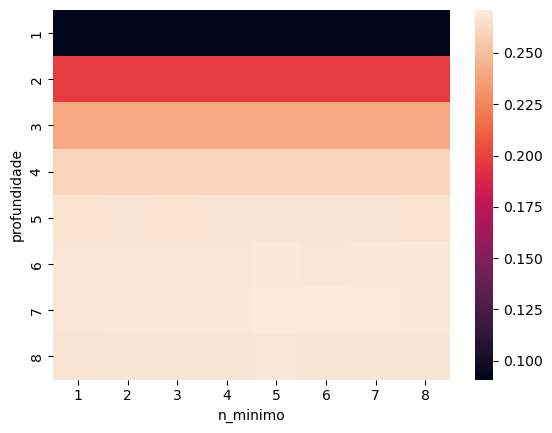

In [26]:
renda_r2 = pd.DataFrame({'r2': r2s, 'profundidade': i_indicador, 'n_minimo': j_indicador})
sns.heatmap(renda_r2.pivot(index='profundidade',
            columns='n_minimo', values='r2'))
renda_r2.pivot(index='profundidade', columns='n_minimo', values='r2')

In [27]:
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500, 1000],
}

# Crie o modelo
rf = RandomForestRegressor(max_depth = 7, min_samples_leaf=7, random_state=42)

# Realize o grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Melhor modelo
best_model = grid_search.best_estimator_

In [28]:
print(best_model)


RandomForestRegressor(max_depth=7, min_samples_leaf=7, n_estimators=500,
                      random_state=42)


In [29]:
modelo_final = RandomForestRegressor(max_depth = 7, min_samples_leaf=7, n_estimators=500, random_state=42)

modelo_final.fit(X_train, y_train)
y_pred = modelo_final.predict(X_test)

## Etapa 5 Crisp-DM: Avaliação dos resultados


<span style="color:red">No modelo apresentado, foi necessário retirar os outliers e substituir pelo desvio padrão da coluna respectiva na qual havia o outlier, foi feito todo o processo de limpeza e remoção de linhas duplicadas e transformar todas as variaveis categorias em 'dummies'. Após isso, começamos a treinar o modelo usando random forest e com ajustes de alguns parammetros, conseguimos no melhor modelo possível para esse conjunto de daos, no qual um r² de 27% </span>



## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com automações


In [30]:
mse = mean_squared_error(y_test, y_pred)
mse

6913894.42591702

In [31]:
r2_train = modelo_final.score(X_train, y_train)
r2_test = modelo_final.score(X_test, y_test)

print(r2_train)
print(r2_test)


0.39964312801732116
0.2704024118782501
